ADF Statistic: -1.7144284156672354
p-value: 0.4236942742926954


/Users/pk/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/pk/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/pk/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/pk/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forec

Best ARIMA order: (2, 1, 2)
                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  256
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -660.598
Date:                Tue, 16 Jul 2024   AIC                           1331.196
Time:                        22:02:09   BIC                           1348.903
Sample:                             0   HQIC                          1338.318
                                - 256                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4367      0.046     -9.481      0.000      -0.527      -0.346
ar.L2         -0.8828      0.046    -18.997      0.000      -0.974      -0.792
ma.L1          0.4299   

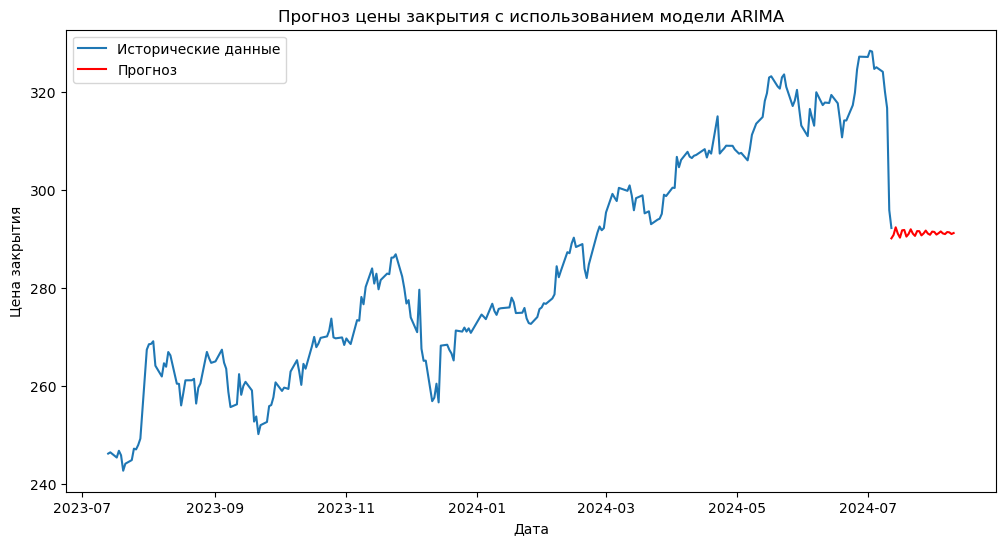

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Загрузка данных
data_path = '/Users/pk/Desktop/Jupyter/хакатон 2.0/history/SBER/1d/2023-07-13-2024-07-13.csv'
data = pd.read_csv(data_path, parse_dates=['begin'], index_col='begin')

# Выбираем столбец с ценами закрытия
close_prices = data['close']

# Проверка стационарности временного ряда
result = adfuller(close_prices)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# Определение параметра d
if result[1] > 0.05:
    d = 1
else:
    d = 0

# Функция для поиска наилучших параметров ARIMA на основе AIC
def find_best_arima_model(data, p_range, d, q_range):
    best_aic = np.inf
    best_order = None
    best_model = None

    for p in p_range:
        for q in q_range:
            try:
                model = ARIMA(data, order=(p, d, q))
                model_fit = model.fit()
                aic = model_fit.aic
                if aic < best_aic:
                    best_aic = aic
                    best_order = (p, d, q)
                    best_model = model_fit
            except:
                continue

    return best_order, best_model

# Диапазоны значений параметров p и q для поиска
p_range = range(0, 5)
q_range = range(0, 5)

# Поиск наилучшей модели
best_order, best_model = find_best_arima_model(close_prices, p_range, d, q_range)
print(f'Best ARIMA order: {best_order}')
print(best_model.summary())

# Прогнозирование на 30 дней вперед
forecast = best_model.forecast(steps=30)
forecast_dates = pd.date_range(start=close_prices.index[-1], periods=30, freq='D')

# Визуализация прогноза
plt.figure(figsize=(12, 6))
plt.plot(close_prices, label='Исторические данные')
plt.plot(forecast_dates, forecast, label='Прогноз', color='red')
plt.xlabel('Дата')
plt.ylabel('Цена закрытия')
plt.title('Прогноз цены закрытия с использованием модели ARIMA')
plt.legend()
plt.show()
